In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from functools import partial

# some visual settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Helper function 

def categ_mapping(value, dct, default='Unclear/None'):
  for key in dct:
    str_type = key.lower()
    if isinstance(value, str):
      str_value = value.lower()
      if str_type in str_value:
        return dct[key]
  return default


def plot_normal(dataset, column, title, palette='Set2'):
  # Plotting
  plt.figure(figsize=(8, 5))
  sns.countplot(x=column, data=dataset, palette=palette)
  plt.title(title)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()
  return

def plot_percentage(dataset, column, title, palette='Set2'):
  # Calculate percentage distribution
  percentages = dataset[column].value_counts(normalize=True) * 100
  # Convert to DataFrame for plotting
  percentage_df = percentages.reset_index()
  percentage_df.columns = [column, 'Percentage']
  
  # Plotting
  plt.figure(figsize=(8, 5))
  # plot pie
  sns.barplot(x=column, y='Percentage', data=percentage_df, palette=palette)
  plt.title(title)
  plt.ylabel('Percentage (%)')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()
  
def plot_percentage_pie(dataset, column, title, colors=None, fn=None):
  # Calculate percentage distribution
  percentages = dataset[column].value_counts(normalize=True) * 100
  # Convert to DataFrame for plotting
  percentage_df = percentages.reset_index()
  percentage_df.columns = [column, 'Percentage']
  
  # Plotting pie chart
    # Create a pie chart with shadow and tighter layout
  plt.figure(figsize=(6, 6))
  plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, colors=colors,
          wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True, 'alpha': 0.9},
          pctdistance=0.85, shadow=True)
  
  # Title styling
  plt.title(title, fontsize=14, weight='bold', pad=20)
  
  # Ensure the layout is tight
  plt.tight_layout()
  if fn:
    plt.savefig(fn)
  plt.show()

In [3]:
DATA_PATH = '../data'
DATA_FILE_INTERVIEWS = os.path.join(DATA_PATH, 'coded_interviews.csv')

In [4]:
data = pd.read_csv(DATA_FILE_INTERVIEWS) 
data.tail()

,Participant_ID,Age,Domicile,Marital_Status,Children_Count,Occupation,Health_Insurance,Employment_Status,Family_Doctor,Primary_Healthcare_Use,Private_Healthcare_Use,Education_Level,Heard_of_Cervical_Cancer,Heard_of_Testing_Programs,Performed_Preventive_Tests,Pap_Smear_Frequency,Last_Pap_Smear,Heard_of_HPV_Test,Performed_HPV_Test,Pre_Test_Information_Source,Project_Information_Source,Reaction_to_Positive_Result,Consulted_with_Others,Follow_Up_Actions,Interpretation_Aid,Current_Recommendations,Sample_Collection_Method,Overall_Experience,Barriers_to_Testing,Barriers_to_Follow_Up,Perception_of_Healthcare_Services,Preventive_Healthcare_Attitude,Knowledge_Acquisition_Method,Perceived_Barriers_in_Healthcare,Impact_of_Urban_vs_Rural,Support_System,Medical_Conditions,Economic_Barriers,Transportation_Issues,Responsibility,Healthcare_Seeking_Behavior,Overall_Insight
37,39,47,Aninoasa,Married,2,Community nurse,Yes,Yes,Yes,Yes,No,Post-secondary health school,Yes,Yes,Yes,Every few years,2018,Yes,No,Participant initiated,Project campaign,Relieved but still cautious,Yes,Regular check-ups,Doctor,Continued monitoring,Clinic-based collection,Positive,Limited access to healthcare in rural areas,Time,Public healthcare,Positive,Healthcare staff,Time and money constraints - rural healthcare ...,Yes,Support from family,Thyroid surgery,Moderate,Yes,Responsible,Proactive seeks care but faces barriers,Grateful for access to healthcare programs val...
38,40,45,Târgu Jiu,Married,2,Monitor for social enterprises,Yes,Employed,Yes,Yes,No,Economics degree,Yes,Yes,Yes,Annually,January 2021,Yes,Yes,Family doctor,Project campaign,Calm and informed,Yes,Pap test every 6 months,Doctor,Repeat Papanicolau at 6 months,Clinic-based collection,Positive,NaN,NaN,Public healthcare,Positive,Personal reading,No major barriers,Urban setting,Support from family,NaN,NaN,NaN,Proactive,Seeks care consistently,Values preventive healthcare and plans to foll...
39,41,34,Craiova,Married,1,Legal advisor,Yes,Employed,Yes,Yes,No,Law and Electrical Engineering,Yes,Yes,Yes,Every 9 years (irregular),Spring 2021,Yes,Yes,Friend,Project campaign,Stressed,Yes,Consulted a gynecologist,Doctor,Repeat testing,Self-sampling,Positive,Neglect,Neglect,Public healthcare,Positive,"Consulting the gynecologist, Researching online",Neglect,Urban setting,Support from colleagues,NaN,Significant costs associated with private heal...,NaN,Neglect of testing,Proactive after initial negligence,Found testing helpful to detect previously unk...
40,42,41,Craiova,Married,1 (adopted),Penitentiary worker,Yes,Employed,Yes,Yes,Yes,High school,Yes,Yes,Yes,Annually,October 2020,Yes,Yes,Doctor at workplace,Friend,Stressed and panicked,Yes,Performed Papanicolau and consulted a gynecolo...,Doctor,"Regular Papanicolau, no further interventions ...",Self-sampling,Positive,Indifference (initially),Lack of information,Public healthcare is useful but inaccessible t...,"Proactive, recommends regular tests",Consulting the doctor,Indifference,More of a rural issue,Encouraged friends and family to test,"Thrombophilia, pregnancy complications",Significant costs for others,No,Regular Papanicolau and healthcare follow-ups,Overall,found the project very helpful and important ...
41,43,38,Craiova,Divorced,1,Nurse,Yes,Employed,Yes,Yes,Yes,High school,Yes,Yes,Yes,Annually,October 2020,Yes,Yes,Colleague from Hospital,Friend,Shock and fear,Yes,Performed treatment but not completed,Doctor,"Repeat testing after treatment, follow up with...",Self-sampling,Positive,Time constraints,"Lack of time, demanding job",Stressed by healthcare costs,Proactive,"Consulting with doctor, seeking vaccination",Limited time due to job and study schedule,More of a general issue,Relies on work colleagues and family,Past cyst surgery and demanding job,Significant for others,No,"Busy schedule, stress, responsibility of child",Overall,optimistic but stressed due to incomplete tre...


In [5]:
for column in list(data.columns):
  if "vaccine" in column.lower():
    print(column)
    print(data[column].unique())


In [6]:
df = data.copy() # Create a copy of the data


## Analyzing the Emotional and Practical Reactions to a Positive HPV Diagnosis
We begin the analysis by loading the dataset and reviewing the Reaction_to_Positive_Result column. This column contains varied responses to a positive HPV diagnosis, which we will aggregate into broader categories to better understand the emotional and practical reactions of participants.

In [7]:
list(df['Reaction_to_Positive_Result'].unique())

['Disbelief and sadness',
 'Shock and panic',
 'Shock and concern',
 'Surprised and panicked',
 'Shock and confusion',
 'Disappointment and acceptance',
 'Uncertainty and stress',
 'Relief and happiness',
 'Shock and acceptance',
 'Shock and adjustment',
 'No significant concern',
 'Shock and disbelief',
 'Scared',
 'Panicked',
 'Shocked',
 'Positive',
 'Anxious but reassured',
 'Reassured after consulting with doctors',
 ' Scared but reassured after consulting doctor',
 'Shocked but reassured after treatment',
 'Uncertain but reassured after consultation',
 'Optimistic but cautious due to minor health issues',
 'Shocked but reassured after medical consultation',
 'Scared but reassured after treatment',
 'Relieved but cautious due to financial concerns',
 'Upset but reassured after researching more about HPV',
 'Shocked immediately sought medical advice',
 'Relieved but still cautious',
 'Calm and informed',
 'Stressed',
 'Stressed and panicked',
 'Shock and fear']

In [29]:
dct_reaction_mapping = {
  
  'advice': 'Taking Action',
  'scheduled': 'Taking Action',
  'treatment': 'Taking Action',
  'consult' : 'Taking Action',
  
  'research': 'Seeking Information',
  'talked': 'Seeking Information',
  'cautious' : 'Seeking Information',
  'calm' : 'Seeking Information',
  'optimistic' : 'Seeking Information',
  'positive' : 'Seeking Information',
  
  'shock': 'Emotional Response',
  'anxiety': 'Emotional Response',
  'fear': 'Emotional Response',
  'denial': 'Emotional Response',
  'disbelief': 'Emotional Response',
  'panick': 'Emotional Response',
  'disappointment ' : 'Emotional Response',
  'stress': 'Emotional Response',
  
}

df['Aggregated_Reaction'] = df['Reaction_to_Positive_Result'].apply(partial(categ_mapping, dct=dct_reaction_mapping))
df[['Reaction_to_Positive_Result','Aggregated_Reaction']].head(10)

,Reaction_to_Positive_Result,Aggregated_Reaction
0,Disbelief and sadness,Emotional Response
1,Shock and panic,Emotional Response
2,Shock and concern,Emotional Response
3,Surprised and panicked,Emotional Response
4,Shock and confusion,Emotional Response
5,Disappointment and acceptance,Emotional Response
6,Uncertainty and stress,Emotional Response
7,Relief and happiness,Unclear/None
8,Shock and acceptance,Emotional Response
9,Shock and adjustment,Emotional Response


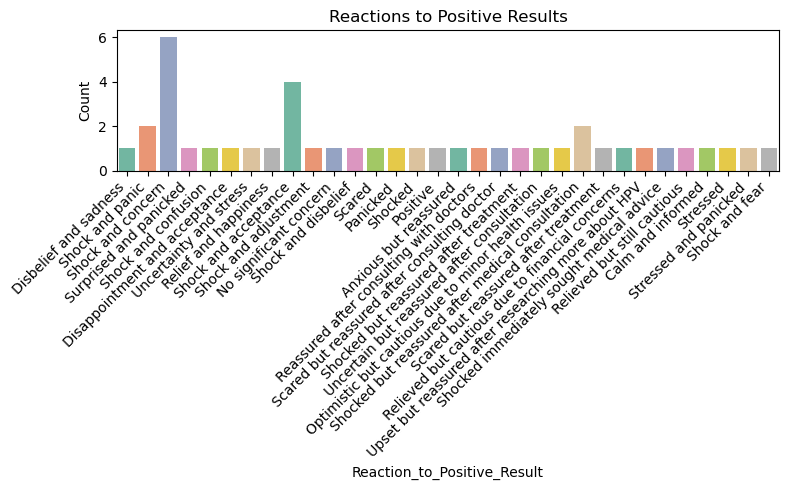

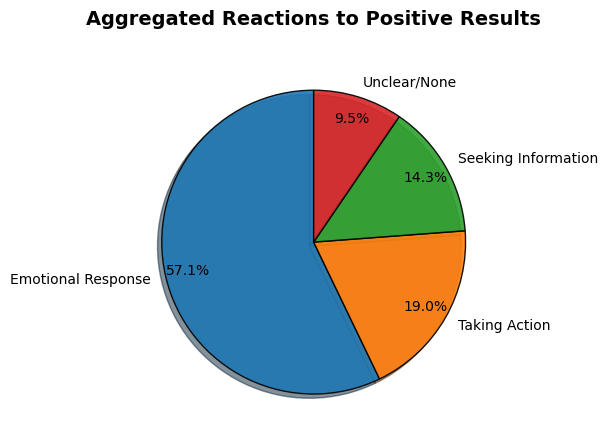

In [30]:
plot_normal(df, 'Reaction_to_Positive_Result', 'Reactions to Positive Results')
plot_percentage_pie(df, 'Aggregated_Reaction', 'Aggregated Reactions to Positive Results', fn='../img/fig_emotion.png')

## Review of the education level of the participants
Here is the distribution of the education level of the participants

In [32]:
list(df['Education_Level'].unique())

['Seventh Grade',
 'College',
 'University',
 'High School',
 'Unknown',
 'Biology degree',
 'Post-high school',
 'Medical school',
 'Vocational School',
 nan,
 'Postgraduate',
 'Post-secondary health school',
 'Economics degree',
 'Law and Electrical Engineering',
 'High school']

In [33]:
dct_education_mapping = {
  'grade': 'Elementary & Middle School',
  
  'high': 'High School', 
  'College': 'High School',
  
  'university': 'Bachelor & above',
  'medical': 'Bachelor & above',
  'degree' : 'Bachelor & above',
  'grad': 'Bachelor & above',
  'phd': 'Bachelor & above',
  'eng' : 'Bachelor & above',
  
}


df['Aggregated_Education'] = df['Education_Level'].apply(partial(categ_mapping, dct=dct_education_mapping))
df[['Education_Level','Aggregated_Education']].head(10)

,Education_Level,Aggregated_Education
0,Seventh Grade,Elementary & Middle School
1,College,High School
2,University,Bachelor & above
3,University,Bachelor & above
4,High School,High School
5,University,Bachelor & above
6,Unknown,Unclear/None
7,Unknown,Unclear/None
8,Unknown,Unclear/None
9,Biology degree,Bachelor & above


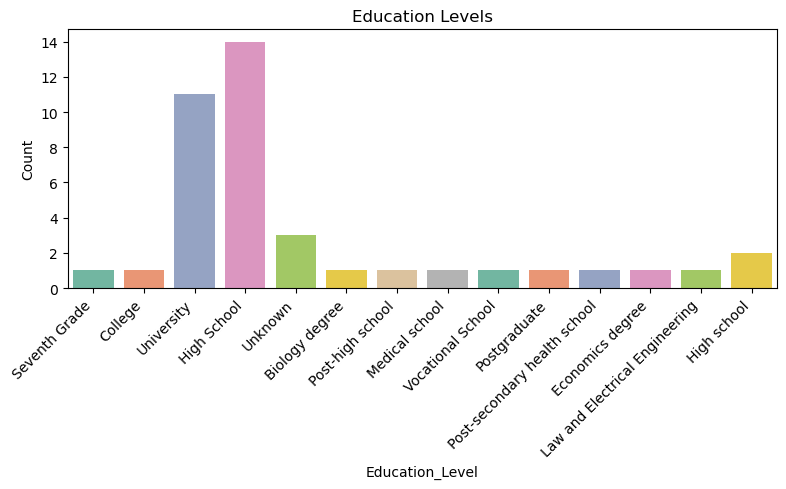

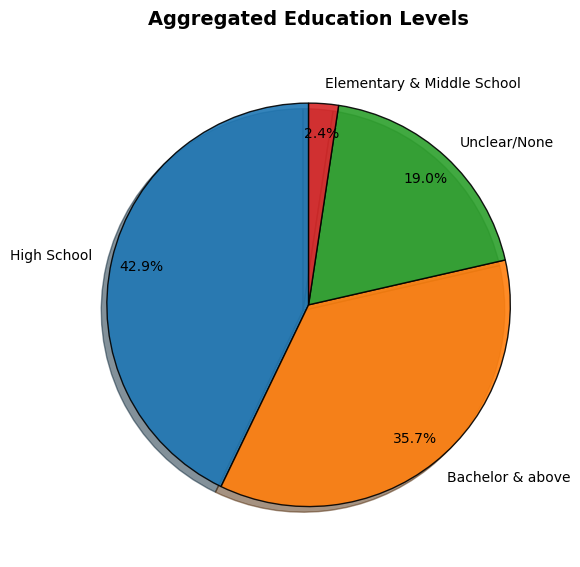

In [12]:
plot_normal(df, 'Education_Level', 'Education Levels')
plot_percentage_pie(df, 'Aggregated_Education', 'Aggregated Education Levels')

## Review of pap smear history of the participants
Here is the distribution of the pap smear history of the participants

In [13]:
list(df['Pap_Smear_Frequency'].unique())

['Annual',
 'Sporadic',
 nan,
 'Biennial',
 'Biannual',
 'Every five years',
 'Every 1-2 years',
 'Annually',
 'Every 2-3 years',
 'Every 6 months',
 'Every 4-5 years',
 'Every 8 years',
 'Every few years',
 'Every 9 years (irregular)']

In [35]:
dct_pap_smear_mapping = {
    'year': 'Regular Screening',
    'al': 'Regular Screening',

    'never': 'Irregular or No Screening',    
    'irregular': 'Irregular or No Screening',
    'sporadic': 'Irregular or No Screening',
}

df['Aggregated_Pap_Smear_Frequency'] = df['Pap_Smear_Frequency'].apply(partial(categ_mapping, dct=dct_pap_smear_mapping,  default='Irregular or No Screening'))
df[['Pap_Smear_Frequency','Aggregated_Pap_Smear_Frequency']].head(10)

,Pap_Smear_Frequency,Aggregated_Pap_Smear_Frequency
0,Annual,Regular Screening
1,Sporadic,Irregular or No Screening
2,Annual,Regular Screening
3,NaN,Irregular or No Screening
4,Annual,Regular Screening
5,Biennial,Regular Screening
6,Annual,Regular Screening
7,Annual,Regular Screening
8,Annual,Regular Screening
9,Annual,Regular Screening


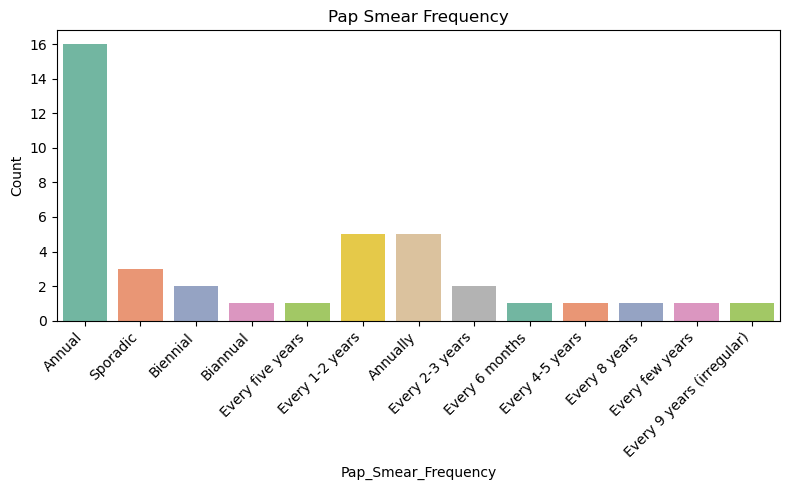

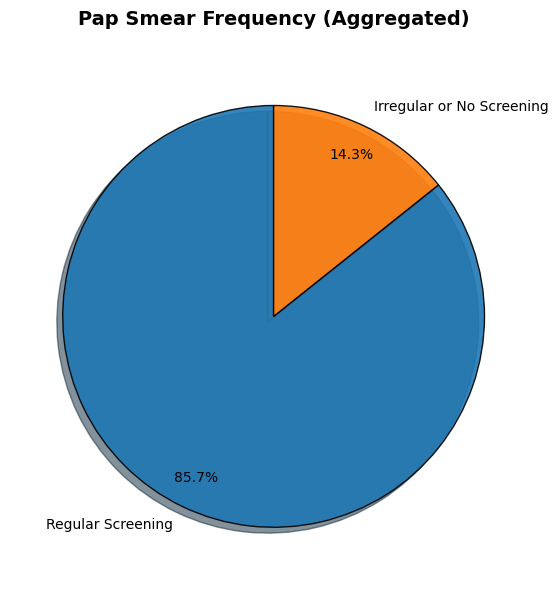

In [36]:
plot_normal(df, 'Pap_Smear_Frequency', 'Pap Smear Frequency')
plot_percentage_pie(df, 'Aggregated_Pap_Smear_Frequency', 'Pap Smear Frequency (Aggregated)', fn='../img/fig_testing.png')

## Overview of the participants' occupation
Now lets move and see the distribution of the occupation of the participants

In [37]:
list(df['Occupation'].unique())

['Housewife',
 'Expert in European funds',
 'Teacher',
 'Professor',
 'Hairdresser',
 'Legal advisor',
 'Computer Operator',
 'Secretary at a notary office',
 'Nurse',
 'Employed',
 'Educator',
 'Public worker',
 'Retired',
 'Disability pensioner',
 'Salesperson',
 'Economist',
 'Health Insurance Inspector',
 'Security Guard',
 'Administrator',
 'Betting Room Attendant',
 'Civil Servant',
 'Manicurist',
 'Engineer',
 'Factory Worker',
 'Unemployed (formerly school secretary)',
 'Community nurse',
 'Monitor for social enterprises',
 'Penitentiary worker']

In [45]:
dct_occupation_mapping = {
'house' : 'Housewife',

'expert' : 'Service industry',
'public' : 'Service industry',
'employed' : 'Service industry',
'sales' : 'Service industry',
'secretary' : 'Service industry',
'engineer' : 'Service industry',
'computer' : 'Service industry',
'worker' : 'Service industry',
'legal' : 'Service industry',
'hair' : 'Service industry',
'econ' : 'Service industry',
'guard' : 'Service industry',
'mani' : 'Service industry',
'serv' : 'Service industry',

'teacher' : 'Education',
'professor' : 'Education',
'educator' : 'Education',

'nurse' : 'Healthcare',
'doctor' : 'Healthcare',

'retired' : 'Retired',
'disability' : 'Retired',

}

df['Aggregated_Occupation'] = df['Occupation'].apply(partial(categ_mapping, dct=dct_occupation_mapping))
df[['Occupation','Aggregated_Occupation']][df['Aggregated_Occupation'] == 'Unclear/None']



,Occupation,Aggregated_Occupation
26,Health Insurance Inspector,Unclear/None
28,Administrator,Unclear/None
29,Betting Room Attendant,Unclear/None
38,Monitor for social enterprises,Unclear/None


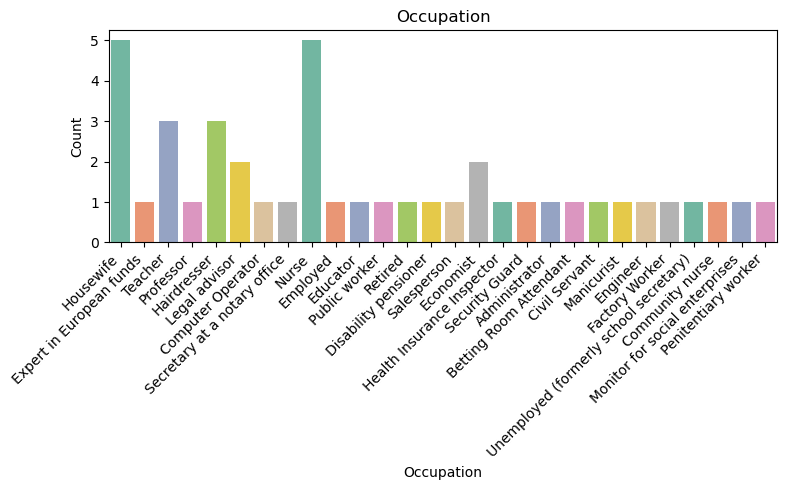

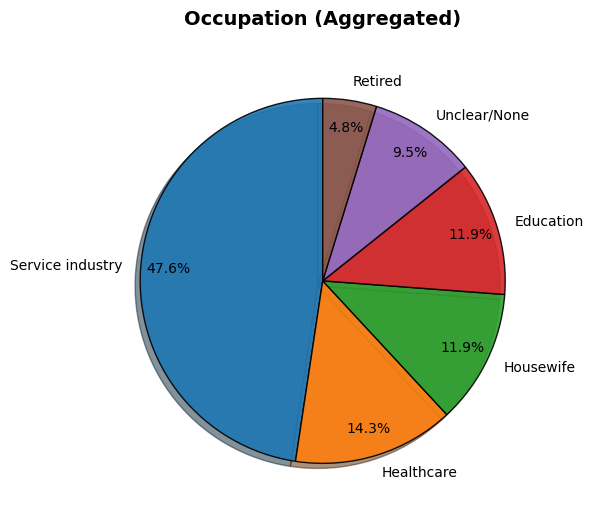

In [46]:
plot_normal(df, 'Occupation', 'Occupation')
plot_percentage_pie(df, 'Aggregated_Occupation', 'Occupation (Aggregated)')

## Analysis of the living (domicile) situation of the participants
Now lets move and see the distribution of the living (domicile) situation of the participants of this interviews

In [47]:
list(df['Domicile'].unique())

['Rural',
 'Urban',
 'Târgu-Jiu',
 'Bumbești-Jiu',
 'Cărbunești',
 'Jupânești',
 'Bustuchin',
 'Bustucheni',
 'Prigoria',
 'Roșia de Vanadă',
 'Roșia de Amaradia',
 'Turceni',
 'Târgu Jiu',
 'Buriteni',
 'Rovinari',
 'Aninoasa',
 'Craiova']

In [48]:
dct_domicile_mapping = {
  'Târgu-Jiu': 'Urban',
  'Turceni': 'Urban',
  'Urban': 'Urban',
}

df['Aggregated_Domicile'] = df['Domicile'].apply(partial(categ_mapping, dct=dct_domicile_mapping, default='Rural'))
df[['Domicile','Aggregated_Domicile']].head(10)


,Domicile,Aggregated_Domicile
0,Rural,Rural
1,Urban,Urban
2,Urban,Urban
3,Urban,Urban
4,Urban,Urban
5,Rural,Rural
6,Urban,Urban
7,Târgu-Jiu,Urban
8,Bumbești-Jiu,Rural
9,Bumbești-Jiu,Rural


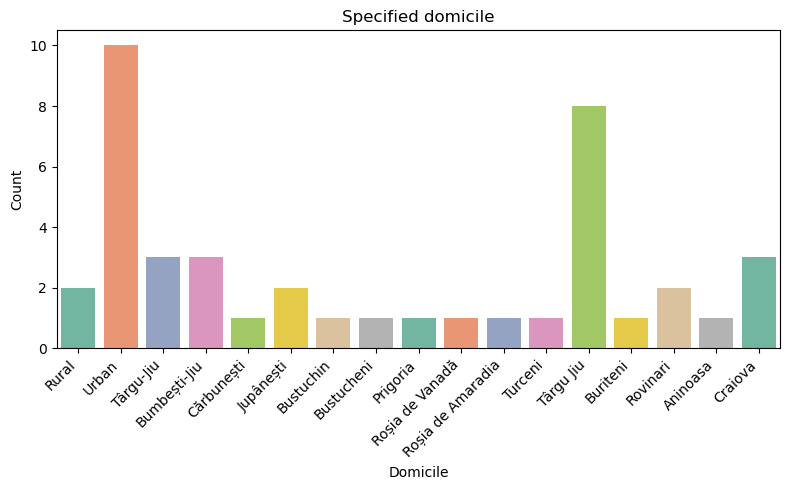

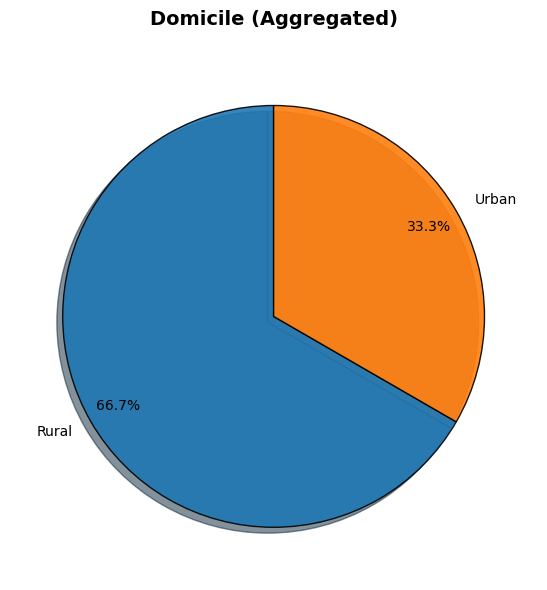

In [49]:
plot_normal(df, 'Domicile', 'Specified domicile')
plot_percentage_pie(df, 'Aggregated_Domicile', 'Domicile (Aggregated)')

## Analysis of the testing awareness vs education level
his analysis will examine how knowledge of HPV testing programs is distributed across different education levels.

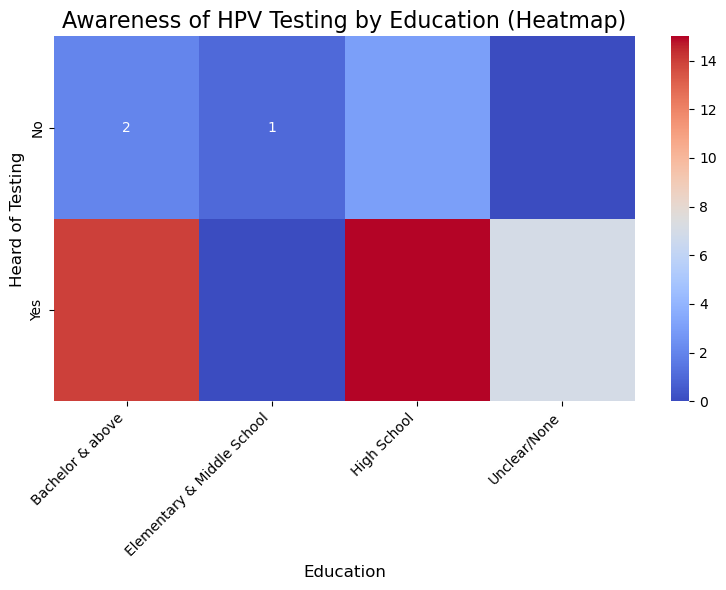

In [50]:
# Crosstab of Heard_of_Testing_Programs vs Education_Level
education_vs_testing = pd.crosstab(df['Heard_of_Testing_Programs'], df['Aggregated_Education'])

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(education_vs_testing, annot=True, fmt='d', cmap='coolwarm')

# Add title and labels
plt.title('Awareness of HPV Testing by Education (Heatmap)', fontsize=16)
plt.ylabel('Heard of Testing', fontsize=12)
plt.xlabel('Education', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../img/fig_education.png')
plt.show()



## Analysis of the cervical cancer awareness in urban and rural areas
This analysis will explore how awareness of cervical cancer varies between urban and rural populations.

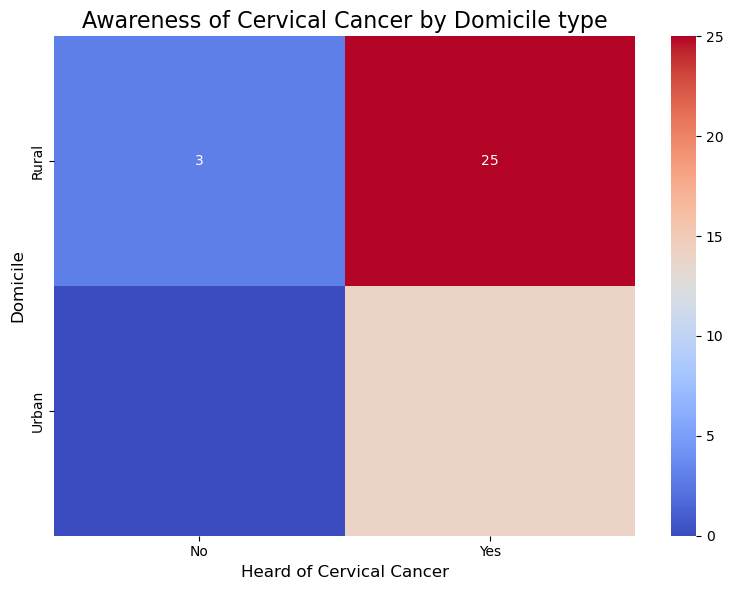

In [51]:
# Crosstab of the variables
heatmap_data = pd.crosstab(df['Aggregated_Domicile'], df['Heard_of_Cervical_Cancer'])

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')

# Add title and labels
plt.title('Awareness of Cervical Cancer by Domicile type', fontsize=16)
plt.xlabel('Heard of Cervical Cancer', fontsize=12)
plt.ylabel('Domicile', fontsize=12)

plt.tight_layout()
plt.show()



# Barriers analysis

## Barriers to testing and vaccination

For the next part we will analyze the barriers to testing and vaccination

In [52]:
df['Perceived_Barriers_in_Healthcare'].unique()

array(['Financial', 'Ignorance', 'Medical education gap',
       'Limited information', 'Detailed information', 'Time', nan,
       'Financial barriers', 'Time barriers',
       'Limited access to trusted doctors',
       'Financial and emotional strain',
       'Financial strain and time constraints', 'Financial strain',
       'Concerns about HPV progression',
       'Emotional stress due to the result',
       'Time and money constraints - rural healthcare struggles',
       'No major barriers', 'Neglect', 'Indifference',
       'Limited time due to job and study schedule'], dtype=object)

In [53]:

dct_barriers_mapping = {
  'time'       : 'Time',
  
  'money'      : 'Money',
  'financ'     : 'Money',
  
  'info'       : 'Information',  
  'edu'        : 'Information', 
  'ignor'      : 'Information',
  'negl'       : 'Information',
  'indif'     : 'Information',
  
  'no' : 'No barriers',
}

df["Aggregated_Barries"] = df['Perceived_Barriers_in_Healthcare'].apply(partial(categ_mapping, dct=dct_barriers_mapping, default='Information'))
df[['Perceived_Barriers_in_Healthcare', 'Aggregated_Barries']].head(10)

,Perceived_Barriers_in_Healthcare,Aggregated_Barries
0,Financial,Money
1,Ignorance,Information
2,Financial,Money
3,Medical education gap,Information
4,Medical education gap,Information
5,Financial,Money
6,Limited information,Information
7,Limited information,Information
8,Limited information,Information
9,Detailed information,Information


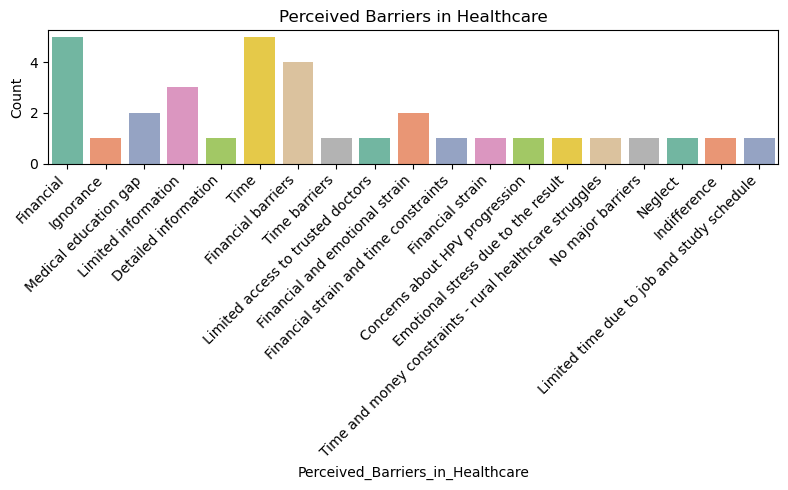

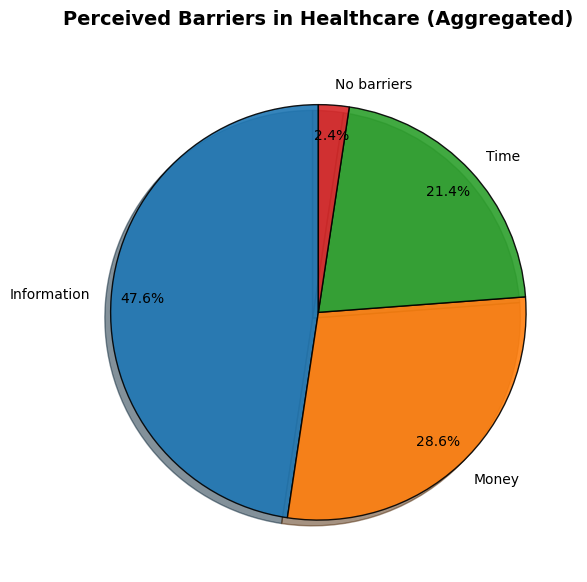

In [54]:
plot_normal(df, 'Perceived_Barriers_in_Healthcare', 'Perceived Barriers in Healthcare')
plot_percentage_pie(df, 'Aggregated_Barries', 'Perceived Barriers in Healthcare (Aggregated)')

## Perception of public healthcare services

In [55]:
df['Perception_of_Healthcare_Services'].unique()

array(['Positive', 'Limited', nan, 'Private preferred',
       'Public healthcare has long wait times', 'Public healthcare used',
       'Private healthcare preferred', 'Public healthcare limited access',
       'Public healthcare',
       'Public healthcare is useful but inaccessible to all',
       'Stressed by healthcare costs'], dtype=object)

In [56]:
dct_services_mapping = {
  'positive' : 'Positive',
  
  'limited'  : 'Negative',
  'wait '   : 'Negative',
  'inacc'  : 'Negative',
  'costs' : 'Negative',
}

df["Aggregated_Services"] = df['Perception_of_Healthcare_Services'].apply(partial(categ_mapping, dct=dct_services_mapping, default='Negative'))
df[['Perception_of_Healthcare_Services', 'Aggregated_Services']].head(10)

,Perception_of_Healthcare_Services,Aggregated_Services
0,Positive,Positive
1,Positive,Positive
2,Positive,Positive
3,Positive,Positive
4,Positive,Positive
5,Positive,Positive
6,Limited,Negative
7,Positive,Positive
8,Positive,Positive
9,Positive,Positive


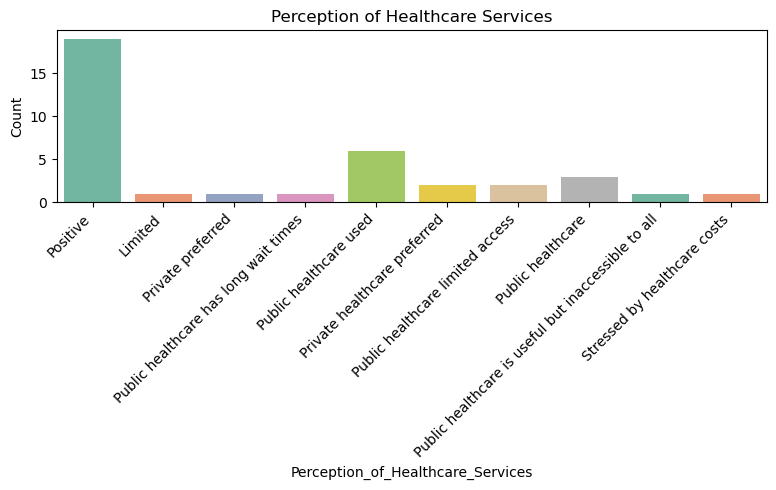

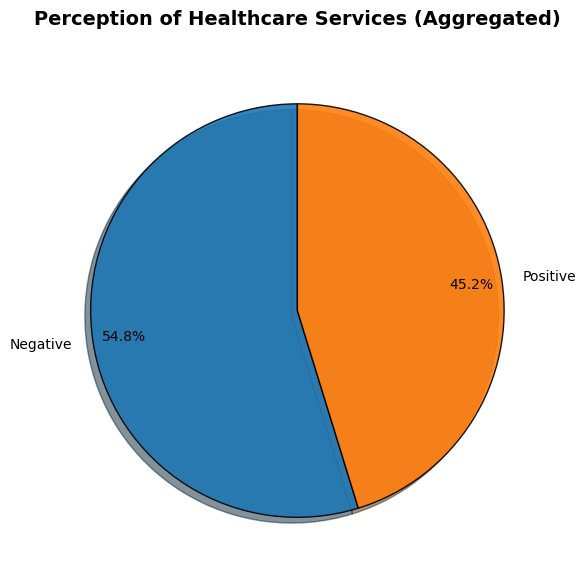

In [57]:
plot_normal(df, 'Perception_of_Healthcare_Services', 'Perception of Healthcare services')
plot_percentage_pie(df, 'Aggregated_Services', 'Perception of Public Healthcare services (Aggregated)')